# Galactic Problem Set 2: Restricted 3-Body Problem
### Peter Chi

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy.integrate import odeint

def orbitint(x0,y0,u0,v0,tsteps=1000):
    """
    Integrate orbits via odeint routine (wrapper for LSODA)
    Units in solar mass, mean Sun-Jupiter distance, and 2pi = 1 Jupiter period
    Inputs: initial conditions x0, y0, u0 = xdot, v0 = ydot
    Outputs: tstep len array of [x,y,u,v] 
    """
    mass_j=.0009546 #m_jupiter in m_sol
    Grav=.999633 #grav constant in above units
    mu1= 1./(1.+mass_j); mu2= mass_j/(1.+mass_j) #reduced masses
    
    def deriv(y,t):
        # compute radii to test mass
        rad1=np.sqrt((y[0]+mu2)**2+y[1]**2)
        rad2=np.sqrt((y[0]-mu1)**2+y[1]**2)
        # compute differential eqn coefficients
        const1=1.-(Grav/(rad1**3))-(Grav*mass_j/(rad2**3))
        const2=Grav*(-(mu2/rad1**3)+(mass_j*mu1/rad2**3))
        # return dy/dt
        return [y[2],\
                y[3],\
                const1*y[0]+2.*y[3]+const2,\
                const1*y[1]-2.*y[2]]
    
    return odeint(deriv,[x0,y0,u0,v0],np.linspace(0,tsteps,tsteps*10))
    
    

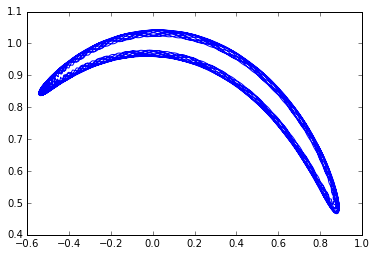

In [3]:
orbit=orbitint(-.51,.88,.026,.015)
plot(orbit[:,0],orbit[:,1])

Tadpole orbit! Stable, period ~1x Jupiter

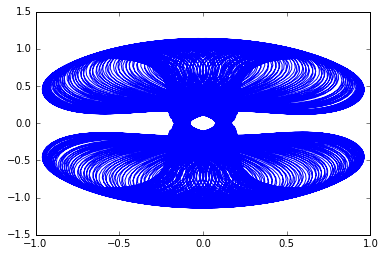

In [4]:
orbit=orbitint(-.52,.91,.65,.037)
plot(orbit[:,0],orbit[:,1])

...stable orbit (although the inner planets would probably make it unstable). Period ~0.5x Jupiter

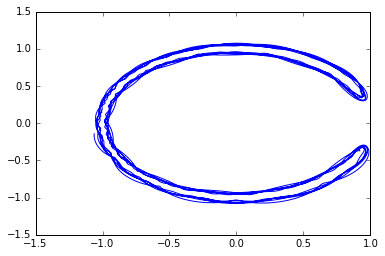

In [5]:
orbit=orbitint(-.52,.92,.078,.043)
plot(orbit[:,0],orbit[:,1])

Horshoe orbit! period ~1x Jupiter

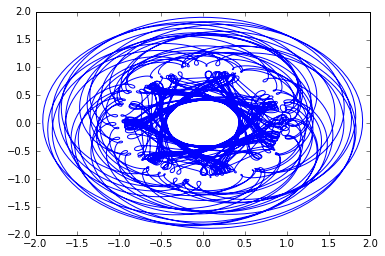

In [6]:
orbit=orbitint(-.51,.88,-.026,-.015)
plot(orbit[:,0],orbit[:,1])

Unstable

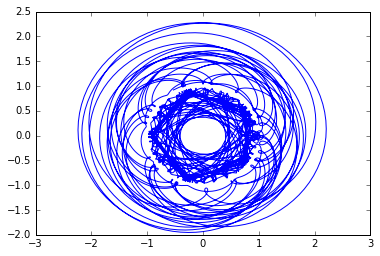

In [7]:
orbit=orbitint(-.53,.92,.078,.043)
plot(orbit[:,0],orbit[:,1])

Unstable